In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Step 1: Load the data using Pandas

In [79]:
x=pd.read_csv('ECG_dataX.csv')
y=pd.read_csv('ECG_dataY.csv')

x=x.values
y=y.values

fs=125
Ts=1/fs
n=187
duration=n*Ts

t=np.linspace(0, duration-Ts, n)
y=np.reshape(y, (3841))

Step 2: Visualize the data

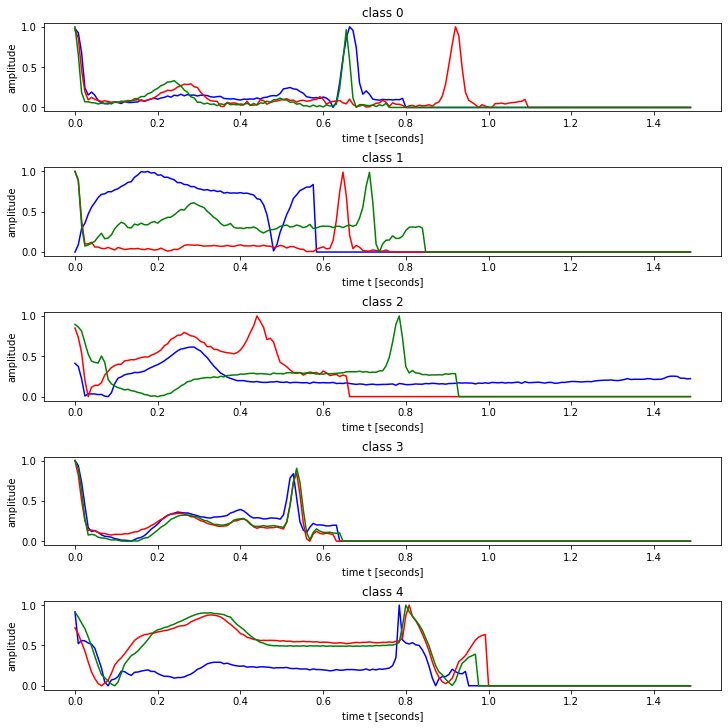

In [80]:
fig, ax = plt.subplots(5,1, constrained_layout=True, figsize=(10,10))
ax[0].set_ylabel('amplitude')
ax[0].set_xlabel('time t [seconds]')
ax[0].set_title('class 0')
ax[0].plot(t, x[0], 'b')
ax[0].plot(t, x[1], 'r')
ax[0].plot(t, x[2], 'g')

ax[1].set_ylabel('amplitude')
ax[1].set_xlabel('time t [seconds]')
ax[1].set_title('class 1')
ax[1].plot(t, x[808], 'b')
ax[1].plot(t, x[809], 'r')
ax[1].plot(t, x[810], 'g')

ax[2].set_ylabel('amplitude')
ax[2].set_xlabel('time t [seconds]')
ax[2].set_title('class 2')
ax[2].plot(t, x[1633], 'b')
ax[2].plot(t, x[1634], 'r')
ax[2].plot(t, x[1635], 'g')

ax[3].set_ylabel('amplitude')
ax[3].set_xlabel('time t [seconds]')
ax[3].set_title('class 3')
ax[3].plot(t, x[2720], 'b')
ax[3].plot(t, x[2721], 'r')
ax[3].plot(t, x[2722], 'g')

ax[4].set_ylabel('amplitude')
ax[4].set_xlabel('time t [seconds]')
ax[4].set_title('class 4')
ax[4].plot(t, x[3300], 'b')
ax[4].plot(t, x[3301], 'r')
ax[4].plot(t, x[3302], 'g')

Step 3: Train-test split to get training and test datasets

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Step 4: Build a KNN classifier to predict class label of a signal

In [82]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [83]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [84]:
print('Training set accuracy: {}'.format(accuracy_score(y_train, y_train_pred)))
print('Test set accuracy: {}'.format(accuracy_score(y_test, y_test_pred)))

Training set accuracy: 0.841796875
Test set accuracy: 0.8543563068920677


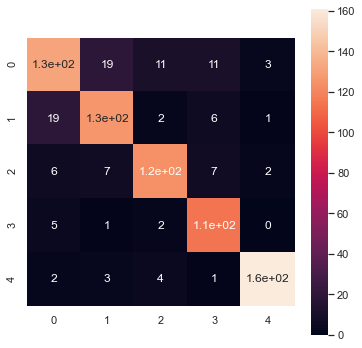

In [92]:
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm, index=['0', '1', '2', '3', '4'],
                    columns = ['0', '1', '2', '3', '4'])
plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True, square=True)